# Mobile Price Classification

This project aims to build a classification model that predicts the **price range** of mobile phones based on their specifications. The dataset contains technical features such as battery power, RAM, number of cores, screen resolution, etc.

- **Goal**: Predict the `price_range` category (0 to 3) using machine learning.
- **Dataset Source**: [Kaggle - Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

We'll follow this structure:
1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Building & Evaluation
5. Conclusion

In [52]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Loading the Dataset

We load both the `train.csv` (which includes the `price_range` target) and `test.csv` (which does not include the target).  
We will first explore the training data.


In [60]:
# Load train and test datasets
train_df = pd.read_csv("train.csv")

# Display first five rows of training data
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## EDA
In this section, we'll explore the dataset and understand its basic structure

In [6]:
# Check shape of the dataset
train_df.shape

(2000, 21)

In [7]:
# Statistics
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Check for missing values
train_df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [9]:
# Data types
train_df.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [11]:
# Count each class in price_range
class_counts = train_df['price_range'].value_counts()
print(class_counts)

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


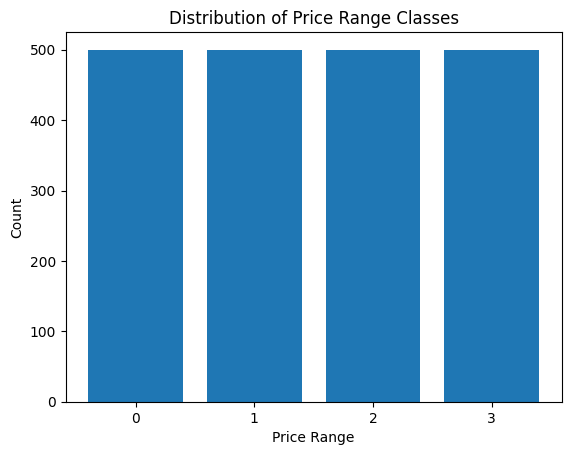

In [16]:
# Visualize the distribution
plt.bar(class_counts.index, class_counts.values)
plt.title('Distribution of Price Range Classes')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])
plt.show()

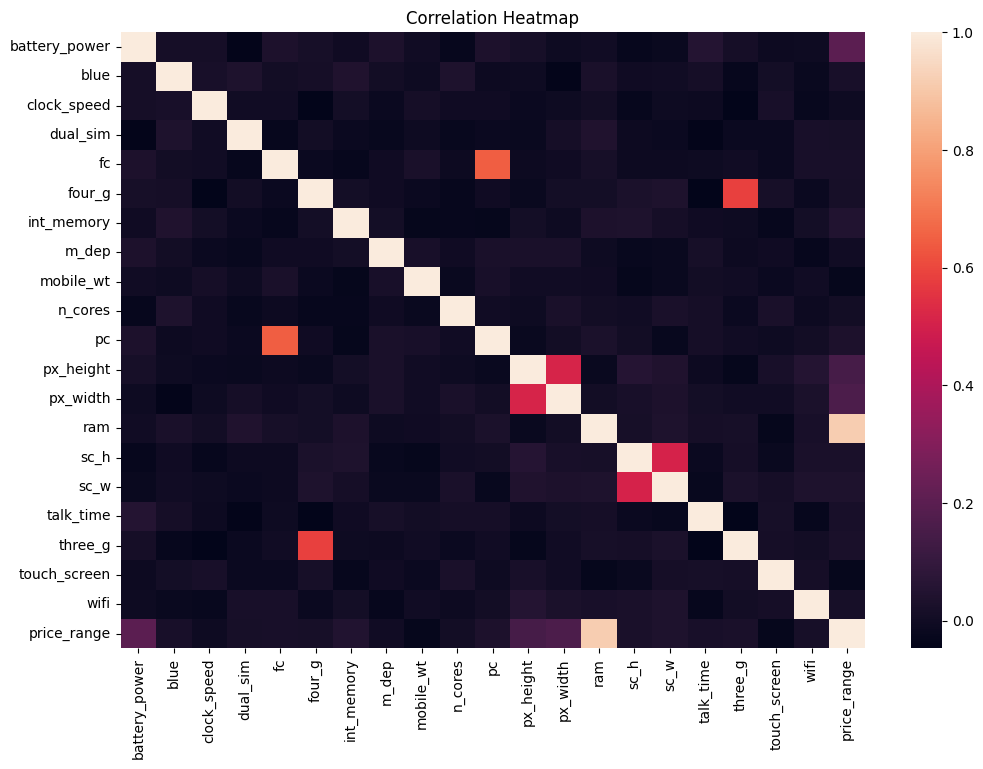

In [20]:
# Correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr())
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing

In this section, we will prepare the data for modeling


In [61]:
# Separate features and target
X = train_df.drop('price_range', axis=1)
y = train_df['price_range']

In [62]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [63]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training & Evaluation

In this section, we will:
- Train a classifier on the train
- Evaluate its performance on the test
- Analyze accuracy, confusion matrix and classification report


In [64]:
# Create & fit the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
# Tune the model with GridSearchCV
param_grid = {
    'max_iter': [200, 400, 600, 800, 1000],
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
tuned_model = LogisticRegression()
grid_search = GridSearchCV(tuned_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [65]:
# Predict test data
y_pred = model.predict(X_test_scaled)

In [66]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

print(f'\nClassification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.97

Confusion Matrix:
[[107   1   0   0]
 [  2  95   3   0]
 [  0   0  80   3]
 [  0   0   1 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.99      0.95      0.97       100
           2       0.95      0.96      0.96        83
           3       0.97      0.99      0.98       109

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



## Conclusion

In this project, I aimed to predict the **price range category** of mobile phones based on their technical specifications using machine learning techniques.  

After exploring and analyzing the dataset, I performed the following steps:

- Handled **data visualization** and **feature distribution** to understand the structure.
- Applied **feature scaling** to normalize our features for better model performance.
- Trained and evaluated different machine learning models including:
  - **Logistic Regression**
  - **KNN**
  - **SVM**
  - **Decision Tree**
  - **Random Forest**

Among these, the **Logistic Regression model** provided the highest accuracy of **97%**, making it my best-performing model.

Although I attempted **hyperparameter tuning** using GridSearchCV, the performance dropped to **88%**, indicating that the default configuration was already optimal in this case.

---

### Final Thoughts:

- The dataset was **well-balanced** and suitable for classification tasks.
- Logistic Regression, despite being a simple model, outperformed more complex ones on this particular data.
- No further tuning or feature engineering was necessary given the excellent performance.
- This model can now be used to **accurately predict mobile price categories** for new data inputs.
